#**Lab 10 - Data Mining**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Musrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to each column
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
# Define target and features
target = 'class'
X = df.drop(target, axis=1)
y = df[target]

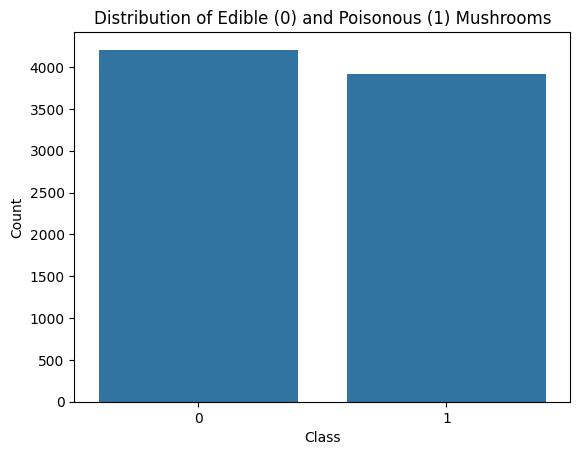

In [ ]:
# Visualize class distribution
sns.countplot(x=y)
plt.title("Distribution of Edible (0) and Poisonous (1) Mushrooms")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

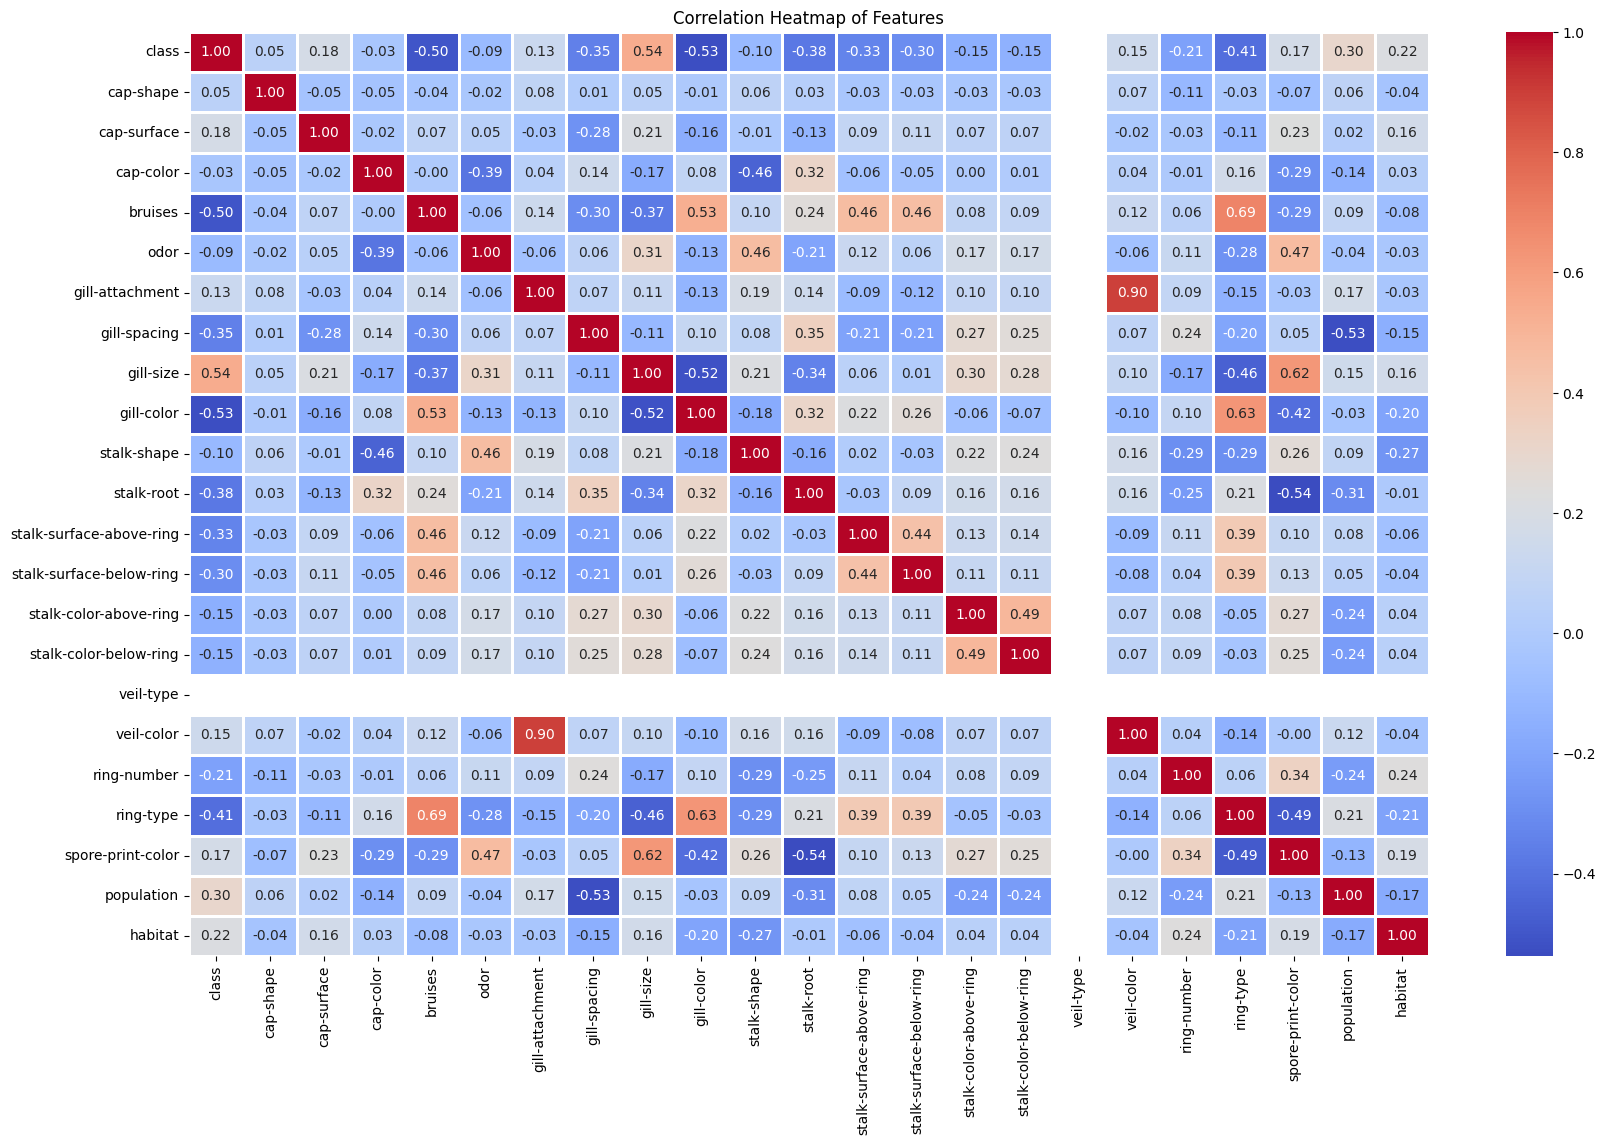

In [ ]:
# Correlation heatmap to see relationships between features
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features')
plt.show()

<ipython-input-166-36637ea0ed4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-166-36637ea0ed4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-166-36637ea0ed4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-166-36637ea0ed4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

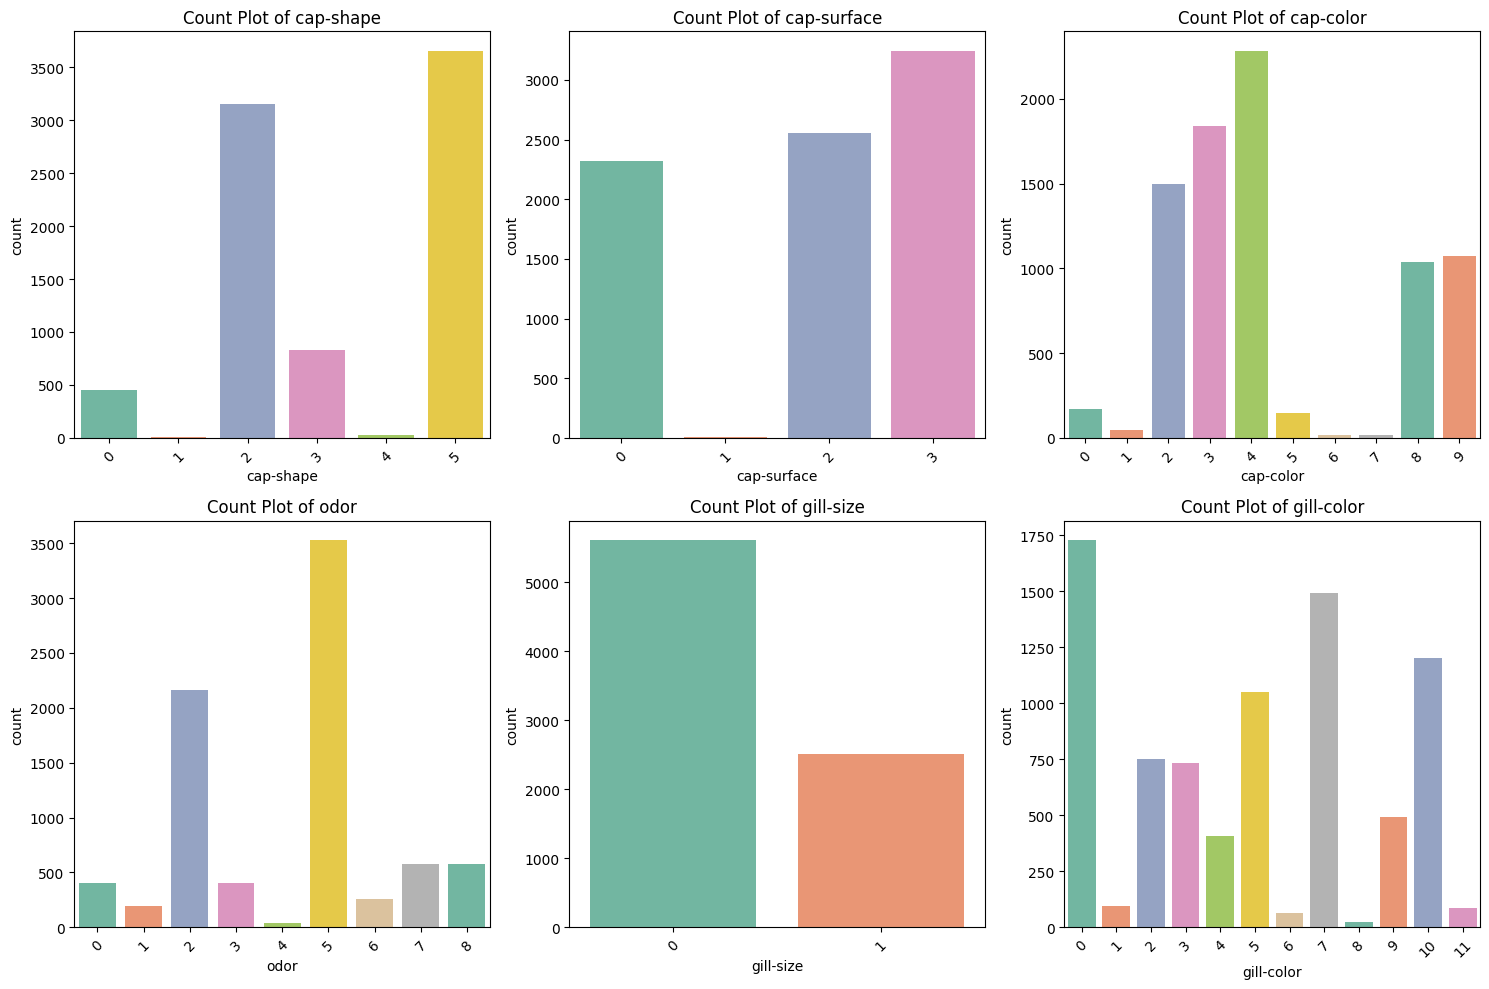

In [ ]:
# Countplots for a selection of features
features_to_plot = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-size', 'gill-color']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Import models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=38)

# Train models
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=38)


--- Naive Bayes Evaluation ---
Accuracy  : 0.9159146841673503
Precision : 0.8949511400651465
Recall    : 0.9353191489361702
F1 Score  : 0.9146899708697461


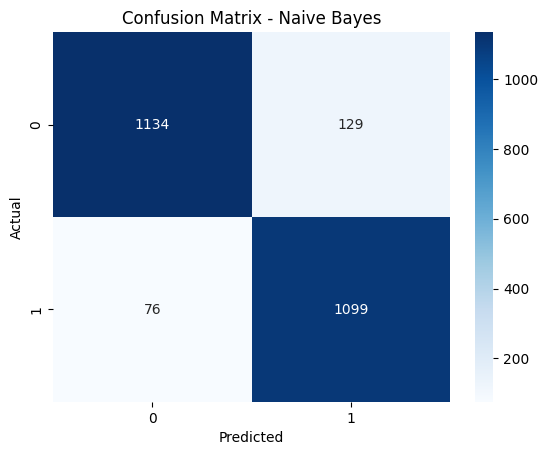

In [ ]:
# Naive Bayes Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with Naive Bayes
y_pred_nb = nb.predict(X_test)

# Evaluation Metrics
print("\n--- Naive Bayes Evaluation ---")
print("Accuracy  :", accuracy_score(y_test, y_pred_nb))
print("Precision :", precision_score(y_test, y_pred_nb))
print("Recall    :", recall_score(y_test, y_pred_nb))
print("F1 Score  :", f1_score(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



--- KNN Evaluation ---
Accuracy  : 0.9979491386382281
Precision : 0.9966044142614601
Recall    : 0.9991489361702127
F1 Score  : 0.9978750531236719


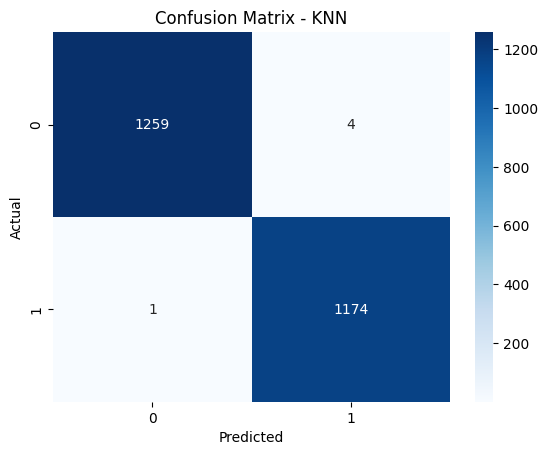

In [ ]:
# KNN Evaluation
# Predict with KNN
y_pred_knn = knn.predict(X_test)

# Evaluation Metrics
print("\n--- KNN Evaluation ---")
print("Accuracy  :", accuracy_score(y_test, y_pred_knn))
print("Precision :", precision_score(y_test, y_pred_knn))
print("Recall    :", recall_score(y_test, y_pred_knn))
print("F1 Score  :", f1_score(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Decision Tree Evaluation ---
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1 Score  : 1.0


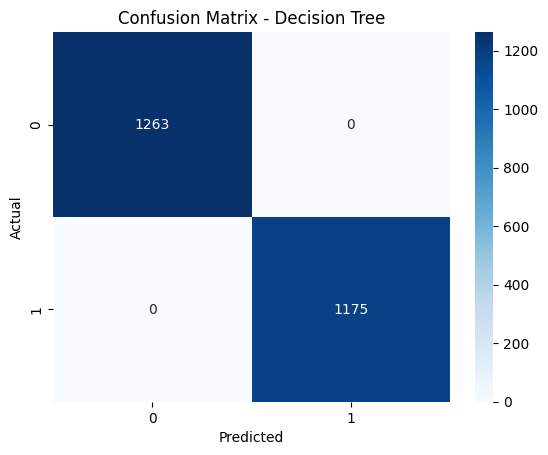

In [ ]:
# Decision Tree Evaluation
# Predict with Decision Tree
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
print("\n--- Decision Tree Evaluation ---")
print("Accuracy  :", accuracy_score(y_test, y_pred_dt))
print("Precision :", precision_score(y_test, y_pred_dt))
print("Recall    :", recall_score(y_test, y_pred_dt))
print("F1 Score  :", f1_score(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

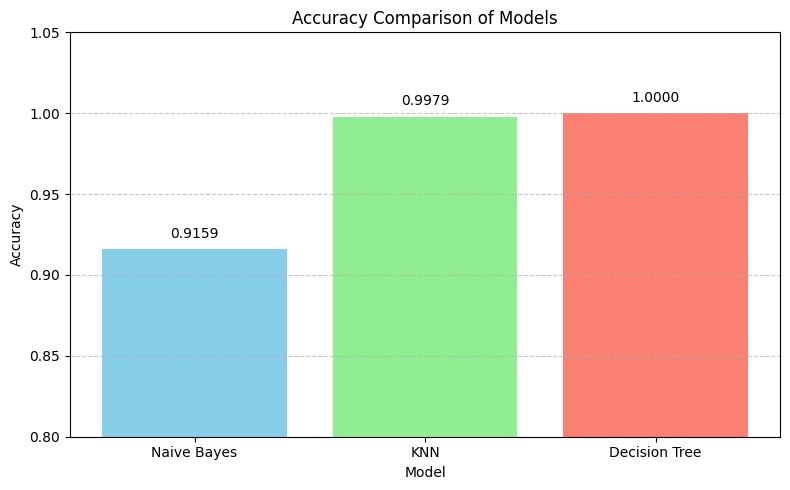

In [ ]:
# Accuracy values (recalculate just in case)
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]
model_names = list(models.keys())

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.title("Accuracy Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Final Recommendation

print("\n📊 Model Comparison Summary:\n")
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")

# Recommendations based on model performance
recommendations = """
Based on the model evaluation:

- Best Model: Decision Tree
  - Accuracy: 1.0000
  - F1 Score: 1.0000

- Why Decision Tree Works Best:
  - Perfect Performance: Achieves both 100% accuracy and F1 score, meaning it makes no mistakes in classifying the mushrooms.
  - High Precision: With both precision and recall at 1.0000, it ensures the highest reliability in distinguishing between edible and poisonous mushrooms.
  - Benefit: Provides the most accurate and reliable predictions, critical in safety-sensitive applications like mushroom classification, where errors can have severe consequences.
"""

# Print the recommendations
print(recommendations)



📊 Model Comparison Summary:

Naive Bayes: Accuracy = 0.9159, F1 Score = 0.9147
KNN: Accuracy = 0.9979, F1 Score = 0.9979
Decision Tree: Accuracy = 1.0000, F1 Score = 1.0000

Based on the model evaluation:

- Best Model: Decision Tree  
  - Accuracy: 1.0000  
  - F1 Score: 1.0000  

- Why Decision Tree Works Best:
  - Perfect Performance: Achieves both 100% accuracy and F1 score, meaning it makes no mistakes in classifying the mushrooms.
  - High Precision: With both precision and recall at 1.0000, it ensures the highest reliability in distinguishing between edible and poisonous mushrooms.
  - Benefit: Provides the most accurate and reliable predictions, critical in safety-sensitive applications like mushroom classification, where errors can have severe consequences.

